# 2009 vs 2014 : India Election Data Analysis

In this case study we'll be conducting an analysis of the results from the Indian Elections in 2009 and 2014. This type of study can be done for any country providing you have the election results datasets.

In [40]:
# Our Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Req'd global titile using fig.suptitle
from pylab import * 

## 1. Data Understanding and Cleaning

In [41]:
# Reading 2009 candidate dataset
LS09Cand = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2009Candidate.csv")
LS09Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,U07,Puducherry,3,2009,1,Puducherry,GEN,DR. R. NARAYANAN,M,GEN,59.0,IND,422.0,24.0
8066,U07,Puducherry,3,2009,1,Puducherry,GEN,MUPPADAI MATHIMAHARAJA,M,GEN,45.0,IND,378.0,25.0
8067,U07,Puducherry,3,2009,1,Puducherry,GEN,MURUGAIYAN. K.S,M,GEN,42.0,IND,378.0,26.0
8068,U07,Puducherry,3,2009,1,Puducherry,GEN,I.M. SEKAR,M,GEN,46.0,IND,375.0,27.0


In [42]:
# Exploring data 
print(len(LS09Cand['State name'].unique()))
LS09Cand['State name'].unique()

35


array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [43]:
# Reading 2014 candidate dataset
LS14Cand = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2014Candidate.csv")
LS14Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465,27
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438,28
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366,29
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309,30


In [44]:
#Merging 2009 & 2014 Candidate datasets vertically stacking them
LS0914Cand = pd.concat([LS09Cand, LS14Cand])
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0


In [45]:
#Checking all political parties abbreviation so that we can make it conscise by including alliance & significant parties
print(len(LS0914Cand['Party Abbreviation'].unique()))
LS0914Cand['Party Abbreviation'].unique()

651


array(['TDP', 'INC', 'PRAP', 'BJP', 'BSP', 'IND', 'TRS', 'MCPI(S)',
       'PPOI', 'RPI(A)', 'LSP', 'TPPP', 'IJP', 'BSP(AP)', 'BPD', 'SP',
       'RKSP', 'MUL', 'ANC', 'UWF', 'SAP', 'AJBP', 'AIMIM', 'JD(S)',
       'MANP', 'GRIP', 'SJP(R)', 'CPI', 'CPM', 'RJD', 'BSSP', 'BHSASP',
       'JD(U)', 'RPI', 'RDHP', 'RDMP', 'CPI(ML)(L)', 'PBHP', 'RPI(KH)',
       'RPC(S)', 'BCUF', 'BJSH', 'RRS', nan, 'LB', 'AC', 'PPA', 'AUDF',
       'ASDC', 'NCP', 'RWS', 'BOPF', 'AGP', 'RVNP', 'LJP', 'RCPI(R)',
       'RSPS', 'AIMF', 'JMM', 'BVM', 'AIFB', 'SHS', 'LTSD', 'BJKVP',
       'BLPGL', 'BJJD', 'RSP', 'RPP', 'JGP', 'KSVP', 'RKJP', 'RJJM',
       'ABAS', 'ABJS', 'RSWD', 'AD', 'RMEP', 'PTSS', 'LPSP', 'SBSP',
       'SJTP', 'BMF', 'SLP(L)', 'KVSP', 'ABDBM', 'NBNP', 'BHJAP',
       'BSP(K)', 'JVM', 'BSKP', 'LM', 'JPS', 'EKSP', 'BUDM', 'BJKD',
       'JKM', 'PMSP', 'SSD', 'AJSP', 'RLD', 'STPI', 'MAG', 'UGDP', 'SGF',
       'BNJD', 'MJP', 'LSWP', 'VHS', 'NLHP', 'KKJHS', 'NSCP', 'RSP(S)',
       'ABMSD', 'S

### Creating an Alliance column for optimized substitution of Winning Party Abbreviation column


In [46]:
# Create a new column copyign the Party Abbreviation
LS0914Cand['Alliance'] = LS0914Cand['Party Abbreviation']

# Making the substitutions, this is hardcoded from our knowledge of the party alliances
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD'],value='UPA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['BJP','SS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF'],value='NDA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value='Others')
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0,Others
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0,CPI(ML)(L)
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0,SAP
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0,NDA


### Getting the seats Won by the each Alliance

In [47]:
# Get the top position then group by alliance and year and sum
seats_won = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Alliance','Year'])['Position'].sum().reset_index()
seats_won

,Alliance,Year,Position
0,ADMK,2009,9.0
1,ADMK,2014,37.0
2,AITC,2009,19.0
3,AITC,2014,34.0
4,BJD,2009,14.0
5,BJD,2014,20.0
6,BSP,2009,21.0
7,CPM,2009,16.0
8,CPM,2014,9.0
9,NDA,2009,143.0


In [48]:
# Next we pivot on Alliance, put the Year as the columns and count the positions 
seats_won = seats_won.pivot(index='Alliance', columns='Year', values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)
seats_won

Year,Alliance,2009,2014
0,NDA,143.0,300.0
1,UPA,245.0,59.0
2,ADMK,9.0,37.0
3,Others,32.0,34.0
4,AITC,19.0,34.0
5,BJD,14.0,20.0
6,SHS,11.0,18.0
7,TDP,6.0,16.0
8,TRS,2.0,11.0
9,CPM,16.0,9.0


## 2. Visualizing 2009 vs 2014

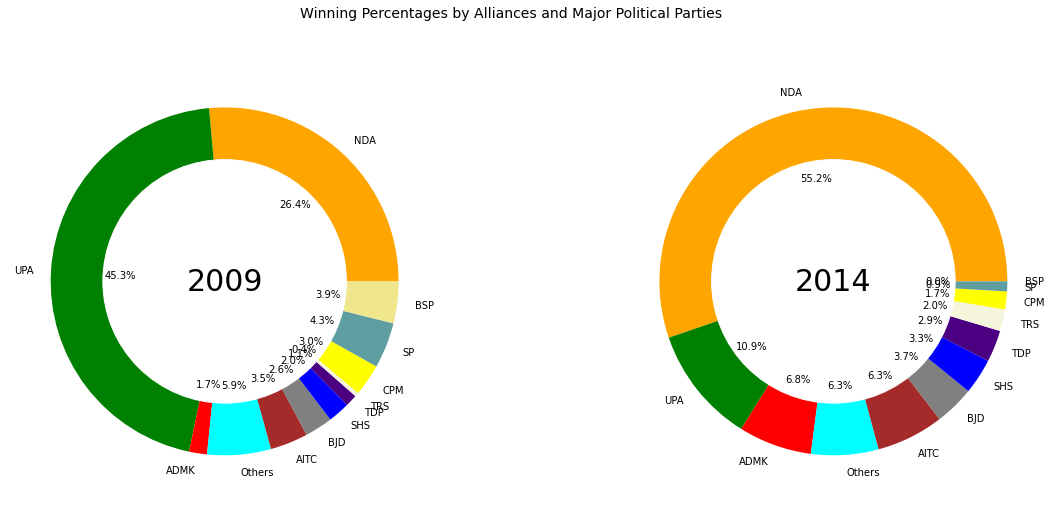

In [49]:
# Seats won by Alliances and Major Political Parties

colors  = ("orange", "green", "red", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow","cadetblue","khaki")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.pie(seats_won[2009], labels=seats_won['Alliance'], colors=colors, autopct='%1.1f%%')
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
fig.suptitle("Winning Percentages by Alliances and Major Political Parties", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle1)

label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()



#plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.pie(seats_won[2014], labels=seats_won['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

#### Comparing Candidate Categories

In [50]:
LS0914Cand.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP


In [51]:
CatWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Candidate Category','Year'])['Position'].sum().reset_index().pivot(index='Candidate Category', columns='Year',values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)
CatWin.head()

Year,Candidate Category,2009,2014
0,GEN,403.0,405.0
1,SC,85.0,85.0
2,ST,53.0,53.0


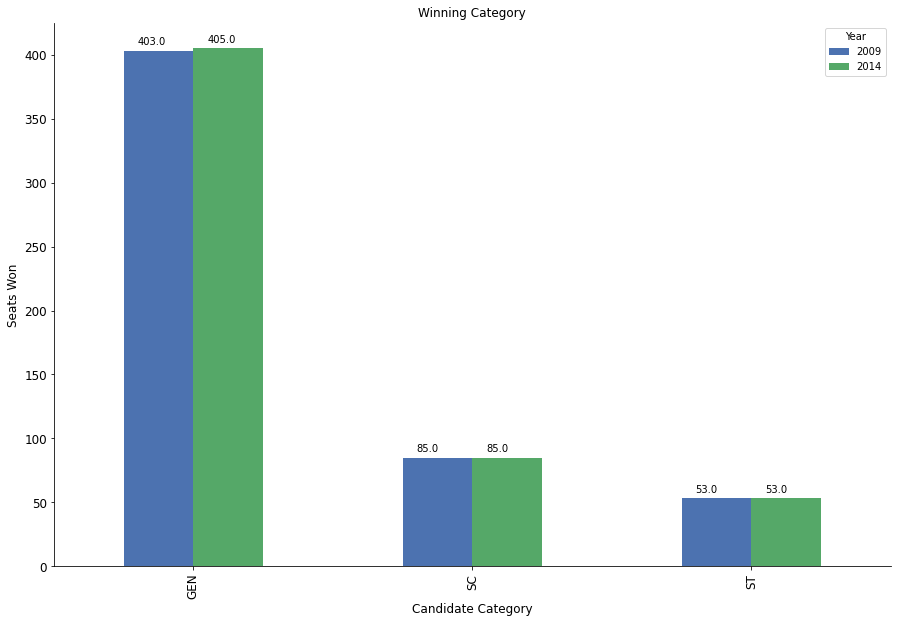

In [52]:
## function to add value label to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
        
CatWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Candidate Category','Year'])['Position'].sum().reset_index().pivot(index='Candidate Category', columns='Year',values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)

nx = CatWin.plot(kind='bar', title ="Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0] = 'GEN'
labels[1]= 'SC'
labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

In [53]:
CatAlliance09 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)
CatAlliance09.head()

Candidate Category,Alliance,GEN,SC,ST
0,ADMK,7.0,2.0,0.0
1,AITC,16.0,3.0,0.0
2,BJD,9.0,2.0,3.0
3,BSP,19.0,2.0,0.0
4,CPM,8.0,6.0,2.0


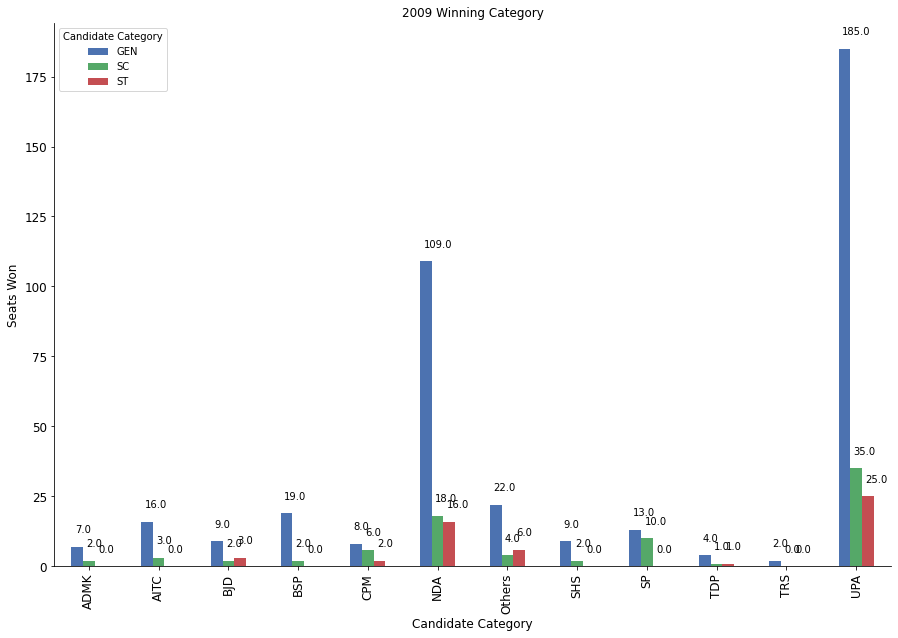

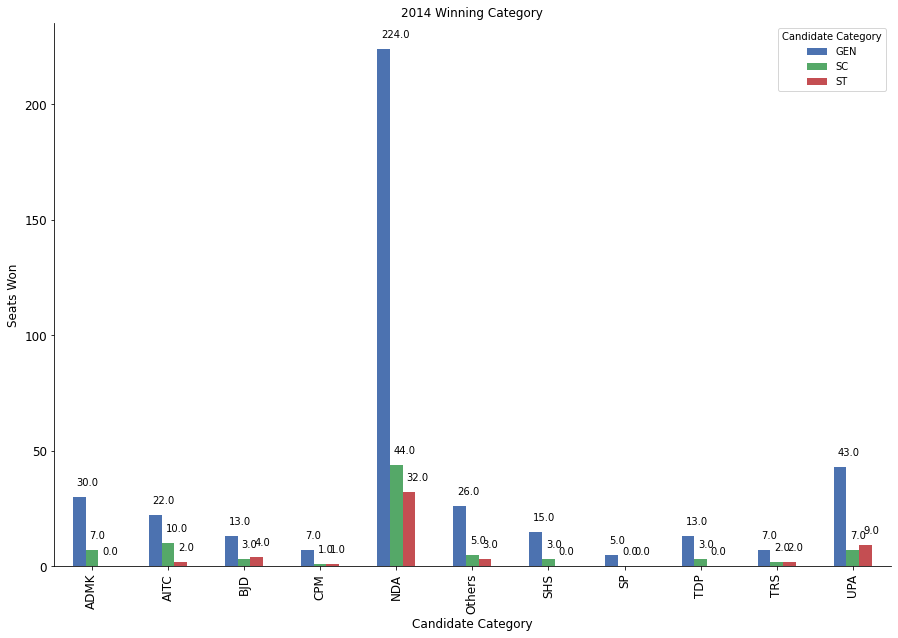

In [54]:
CatAlliance09 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)
CatAlliance14 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)

nx = CatAlliance09.plot(kind='bar', title ="2009 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = CatAlliance09['Alliance']
#labels[1]= 'SC'
#labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

nx = CatAlliance14.plot(kind='bar', title ="2014 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = CatAlliance14['Alliance']
#labels[1]= 'SC'
#labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

#### Comparing Age Distriuction of the Winners

In [55]:
bins = np.linspace(20, 90, 10)
bins

array([20.        , 27.77777778, 35.55555556, 43.33333333, 51.11111111,
       58.88888889, 66.66666667, 74.44444444, 82.22222222, 90.        ])

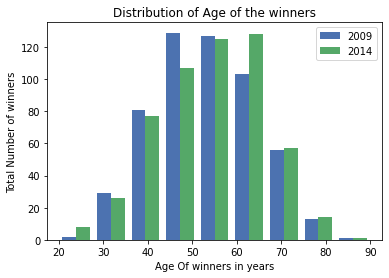

In [56]:
plt.style.use('seaborn-deep')
Age09=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)]['Candidate Age'].tolist()
Age14=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)]['Candidate Age'].tolist()
bins = np.linspace(20, 90, 10)

plt.hist([Age09, Age14], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of winners in years')
plt.ylabel('Total Number of winners')
plt.title('Distribution of Age of the winners')
plt.show()

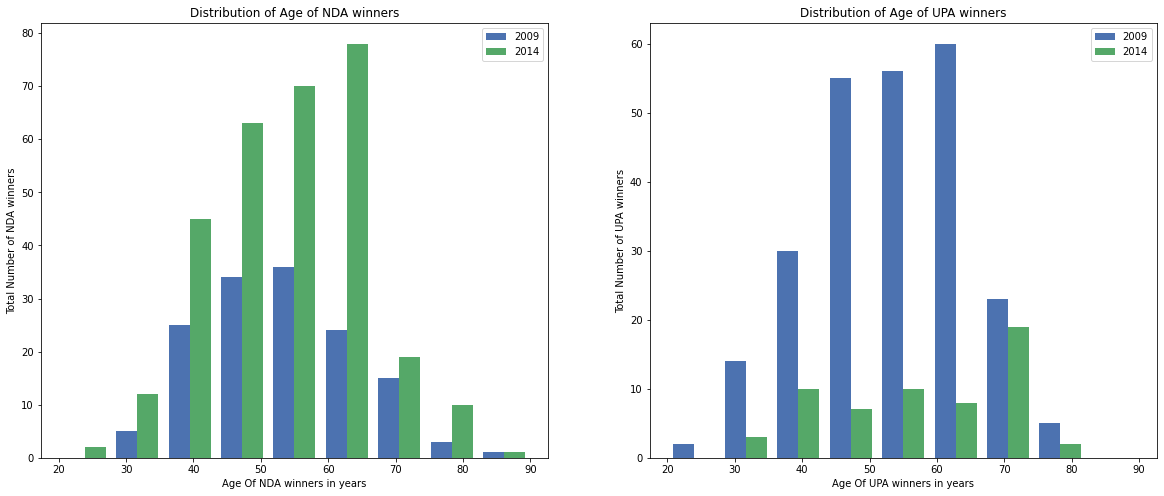

In [57]:
# Age Distribution of Winning Candidates in 2009 & 2014 for NDA & UPA in India Elections

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.style.use('seaborn-deep')

Age09UPA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['Candidate Age'].tolist()
Age14UPA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['Candidate Age'].tolist()
Age09NDA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['Candidate Age'].tolist()
Age14NDA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['Candidate Age'].tolist()

bins = np.linspace(20, 90, 10)
plt.hist([Age09NDA, Age14NDA], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of NDA winners in years')
plt.ylabel('Total Number of NDA winners')
plt.title('Distribution of Age of NDA winners')


plt.subplot(1,2,2)
bins = np.linspace(20, 90, 10)
plt.hist([Age09UPA, Age14UPA], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of UPA winners in years')
plt.ylabel('Total Number of UPA winners')
plt.title('Distribution of Age of UPA winners')

plt.show();

## 3. Comparing Gender and Voter Turnout

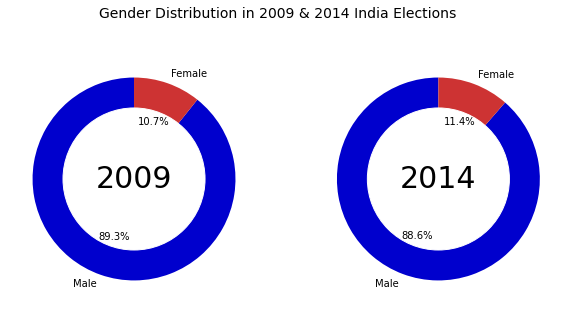

In [69]:
# Gender Distribution of Winning Candidates in 2009 & 2014 India Elections
colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 & 2014 India Elections", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

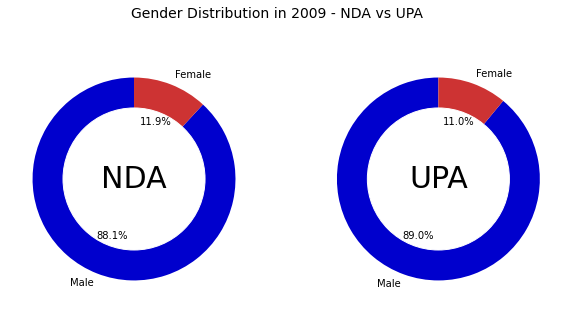

In [59]:
# Gender Distribution of Winning Candidates in 2009 - NDA vs UPA in India Elections
colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

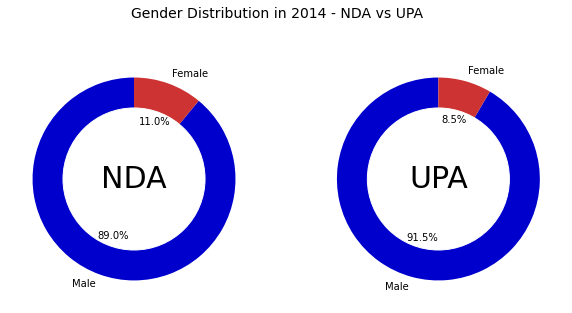

In [60]:
# Gender Distribution of Winning Candidates in 2014 - NDA vs UPA in India Elections

colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.title('2014')
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2014 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

#### Comparing Voter Turnouts in each state for 2009 and 2014

In [61]:
# Reading 2009 Electors dataset
LS09Elec = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2009Electors.csv")
print(LS09Elec.shape)
LS09Elec.head()

(543, 8)


,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83


In [62]:
# Reading 2014 Electors dataset

LS14Elec = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2014Electors.csv")

print(LS09Elec.shape)
LS14Elec.head()

(543, 8)


,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,1055593,1386282,76.15
1,S01,Andhra Pradesh,2,Peddapalle,1025194,1425355,71.93
2,S01,Andhra Pradesh,3,Karimnagar,1127225,1550810,72.69
3,S01,Andhra Pradesh,4,Nizamabad,1034032,1496193,69.11
4,S01,Andhra Pradesh,5,Zahirabad,1099784,1445354,76.09


In [63]:
LS09Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [64]:
LS14Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [65]:
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Odisha'],value='Orissa')
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Chhattisgarh'],value='Chattisgarh')

In [76]:
# Data preparation 2009
LS09Elec = LS09Elec.groupby('STATE').mean()
LS09 = LS09Elec[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending=False).to_dict()
Y09=[2009 for i in range(35)]
S09=list(LS09['POLL PERCENTAGE'].keys())
P09=list(LS09['POLL PERCENTAGE'].values())

# Data preparation 2014
LS14Elec = LS14Elec.groupby('STATE').mean()
LS14 = LS14Elec[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending=False).to_dict()
Y14=[2014 for i in range(35)]
S14=list(LS14['POLL PERCENTAGE'].keys())
P14=list(LS14['POLL PERCENTAGE'].values())

Data = {'YEAR':Y09+Y14,'STATE':S09+S14,'Poll_Percentage':P09+P14}
Data

{'Poll_Percentage': [90.0,
  85.9,
  84.475,
  83.93,
  81.55190476190475,
  79.81,
  77.0,
  73.49,
  73.35142857142857,
  73.23,
  73.12153846153845,
  71.32,
  69.76846153846154,
  69.49857142857142,
  68.65,
  67.383,
  65.51,
  65.36,
  64.945,
  64.16,
  59.611428571428576,
  58.482499999999995,
  55.504999999999995,
  55.3909090909091,
  52.952,
  52.03142857142858,
  51.86,
  51.480714285714285,
  51.31896551724138,
  51.02541666666667,
  48.4648,
  48.05012500000001,
  47.91461538461538,
  44.7325,
  43.40833333333333,
  87.91,
  86.62,
  84.86500000000001,
  84.09,
  83.64,
  82.22166666666668,
  82.1,
  79.88,
  79.80142857142857,
  79.59,
  78.01,
  77.11,
  75.81619047619047,
  74.03179487179487,
  74.0155,
  73.89190476190478,
  73.71,
  71.49000000000001,
  70.68153846153847,
  70.675,
  70.67,
  69.5209090909091,
  67.75321428571428,
  65.22428571428571,
  64.42,
  63.96785714285714,
  63.66884615384615,
  63.07280000000001,
  61.95,
  61.721034482758625,
  60.761999999

In [77]:
df = pd.DataFrame(data=Data)
df

,YEAR,STATE,Poll_Percentage
0,2009,Nagaland,90.000000
1,2009,Lakshadweep,85.900000
2,2009,Tripura,84.475000
3,2009,Sikkim,83.930000
4,2009,West Bengal,81.551905
...,...,...,...
65,2014,Uttarakhand,60.762000
66,2014,Maharashtra,60.513542
67,2014,Uttar Pradesh,58.599875
68,2014,Bihar,56.487500


Text(0.5, 1.0, 'Voter Turnout States 2009 and 2014')

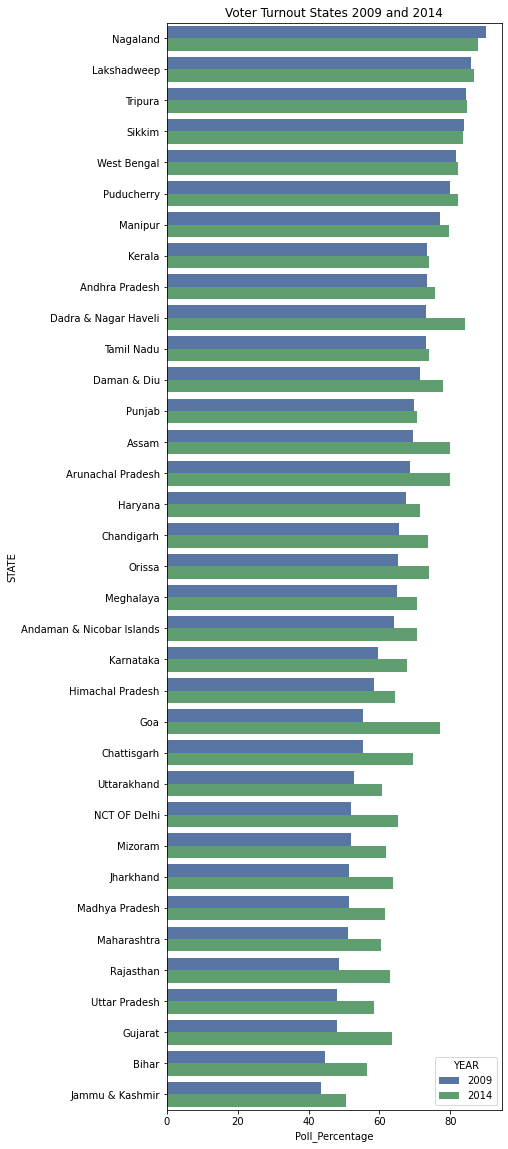

In [78]:
ax = plt.subplots(figsize=(6, 20))
sns.barplot(x=DF.Poll_Percentage,y=DF.STATE,hue=DF.YEAR)
plt.title('Voter Turnout States 2009 and 2014')